In [1]:
%pylab inline
import random
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


#### Feladathoz használt általam definiált függvények

In [4]:
def myNewTree(N,kapcsolo):
    '''
    lineárisan növekvő 
    preferenciájú hálózatot
    legyártó függvény,
    N a csúcsok száma,
    olyan myTree listát generál,
    amelynek indexei a 
    csúcsazonositóknak
    felelnek meg,
    a benne adott indexnél tárolt
    érték pedig az adott csúcs
    sorsolt párjának azonosítója.
    A sorsolásnál a több éllel bíró
    csúcsok nagyobb eséllyel 
    kerülnek kiválasztásra
    '''
    if kapcsolo=='1':
        linPref=[0,1] #kezdetben van 2 csúcs
        myTree=[1,0] #csatlakozás egyértelmű
            
    if kapcsolo=='2':
        linPref=[0,1,1,2,2,3,3,4] #kezdetben van 5 csúcs
        myTree=[1,0,1,2,3] 
        
    if kapcsolo=='3':
        linPref=[0,1,1,1,1,2,3,4] #kezdetben van 5 csúcs
        myTree=[1,0,1,1,1] 
                    
    
    i=len(myTree)
    while i<N: #i=2,...,N-1 vagy i=5,...,N-1
        s=random.randint(0,len(linPref)-1)
        linPref.append(linPref[s])
        linPref.append(i)
        myTree.append(linPref[s])
        i+=1
    
    return myTree

In [5]:
def fokszamolo(myTree):
    '''
    ez a függvény gyártja le 
    a fokszámeloszlás ábrázolásához
    szükséges tömböt a myTree
    listából, 
    a visszaadott tömb tartalmazza
    N csúcsszám mellett
    k=1-től (N-1)-ig adott k 
    értékekre a gyakoriságot,
    hiszen tudjuk, hogy minden
    csúcs legalább 1 és legfeljebb 
    N-1 csúcshoz csatlakozhat
    '''
    
    fokszamok=zeros(len(myTree),dtype=int)
    i=0
    while i<N: #i=2,...,N-1
        j=0
        cnt=0
        while j<N: #j=2,...,N-1
            if myTree[j]==i:
                cnt+=1
            j+=1
        fokszamok[i]=cnt    
        i+=1
        
    print('átlagos k: ',mean(fokszamok))
    print('maximális k: ',max(fokszamok))
    treeDist=[]
    i=1
    while i<len(fokszamok)-1: #i=1,...,N-2
        j=0
        cnt=0
        while j<len(fokszamok): #j=0,...,N-1
            if fokszamok[j]==i:
                cnt+=1
            j+=1
        treeDist.append(cnt)    
        i+=1
    
    return array(treeDist)

#### Feladathoz használt könytári segédfüggvények

In [6]:
help(random.randint)

Help on method randint in module random:

randint(a, b) method of random.Random instance
    Return random integer in range [a, b], including both end points.



In [7]:
help(mean)

Help on function mean in module numpy:

mean(a, axis=None, dtype=None, out=None, keepdims=<no value>)
    Compute the arithmetic mean along the specified axis.
    
    Returns the average of the array elements.  The average is taken over
    the flattened array by default, otherwise over the specified axis.
    `float64` intermediate and return values are used for integer inputs.
    
    Parameters
    ----------
    a : array_like
        Array containing numbers whose mean is desired. If `a` is not an
        array, a conversion is attempted.
    axis : None or int or tuple of ints, optional
        Axis or axes along which the means are computed. The default is to
        compute the mean of the flattened array.
    
        .. versionadded:: 1.7.0
    
        If this is a tuple of ints, a mean is performed over multiple axes,
        instead of a single axis or all the axes as before.
    dtype : data-type, optional
        Type to use in computing the mean.  For integer inputs,

In [8]:
help(max)

Help on built-in function max in module builtins:

max(...)
    max(iterable, *[, default=obj, key=func]) -> value
    max(arg1, arg2, *args, *[, key=func]) -> value
    
    With a single iterable argument, return its biggest item. The
    default keyword-only argument specifies an object to return if
    the provided iterable is empty.
    With two or more arguments, return the largest argument.



In [9]:
help(std)

Help on function std in module numpy:

std(a, axis=None, dtype=None, out=None, ddof=0, keepdims=<no value>)
    Compute the standard deviation along the specified axis.
    
    Returns the standard deviation, a measure of the spread of a distribution,
    of the array elements. The standard deviation is computed for the
    flattened array by default, otherwise over the specified axis.
    
    Parameters
    ----------
    a : array_like
        Calculate the standard deviation of these values.
    axis : None or int or tuple of ints, optional
        Axis or axes along which the standard deviation is computed. The
        default is to compute the standard deviation of the flattened array.
    
        .. versionadded:: 1.7.0
    
        If this is a tuple of ints, a standard deviation is performed over
        multiple axes, instead of a single axis or all the axes as before.
    dtype : dtype, optional
        Type to use in computing the standard deviation. For arrays of
       

#### Szimuláció egy csúcsból

#### 4 mérés $N=100$ esetére

In [10]:
N=100

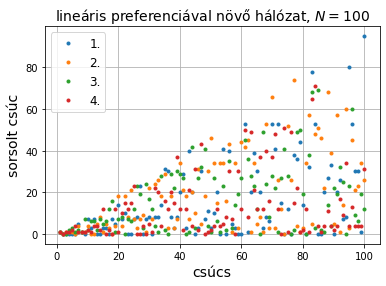

In [11]:
tree100a=myNewTree(N,'1')
grid100=array([x for x in range(1,len(tree100a)+1)])
plot(grid100,tree100a,'.', label='1.')
tree100b=myNewTree(N,'1')
grid100=array([x for x in range(1,len(tree100b)+1)])
plot(grid100,tree100b,'.', label='2.')
tree100c=myNewTree(N,'1')
grid100=array([x for x in range(1,len(tree100c)+1)])
plot(grid100,tree100c,'.', label='3.')
tree100d=myNewTree(N,'1')
grid100=array([x for x in range(1,len(tree100d)+1)])
plot(grid100,tree100d,'.', label='4.')
grid()
xlabel('csúcs', fontsize=14)
ylabel('sorsolt csúc', fontsize=14)
title('lineáris preferenciával növő hálózat, 'r'$N= 100$', fontsize=14)
legend(prop={'size': 12})
savefig('1B100.png')

átlagos k:  1.0
maximális k:  24
átlagos k:  1.0
maximális k:  13
átlagos k:  1.0
maximális k:  10
átlagos k:  1.0
maximális k:  16


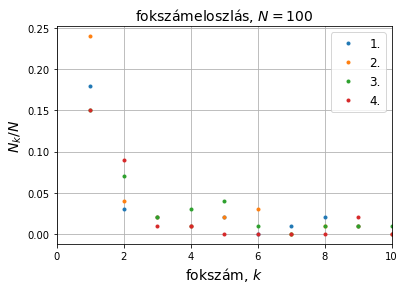

In [12]:
fok100a=fokszamolo(tree100a)
gridFok100=array([x for x in range(1,len(fok100a)+1)])
plot(gridFok100,fok100a/N,'.', label='1.')
fok100b=fokszamolo(tree100b)
gridFok100=array([x for x in range(1,len(fok100b)+1)])
plot(gridFok100,fok100b/N,'.', label='2.')
fok100c=fokszamolo(tree100c)
gridFok100=array([x for x in range(1,len(fok100c)+1)])
plot(gridFok100,fok100c/N,'.', label='3.')
fok100d=fokszamolo(tree100d)
gridFok100=array([x for x in range(1,len(fok100d)+1)])
plot(gridFok100,fok100d/N,'.', label='4.')
grid()
xlabel('fokszám, 'r'$k$', fontsize=14)
ylabel(r'$N_k/N$', fontsize=14)
xlim(0,10)
title('fokszámeloszlás, 'r'$N= 100$', fontsize=14)
legend(prop={'size': 12})
savefig('fok1B100.png')

In [49]:
means= []
ks100=array([24,13,10,16])
means.append(mean(ks100))
mean(ks100)

15.75

#### 4 mérés $N=1000$ esetére

In [14]:
N=1000

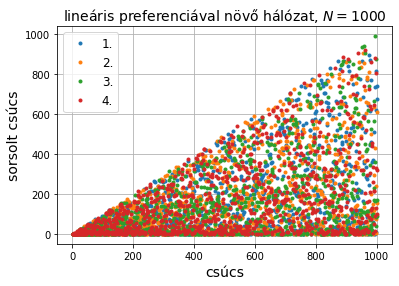

In [15]:
tree1000a=myNewTree(N,'1')
grid1000=array([x for x in range(1,len(tree1000a)+1)])
plot(grid1000,tree1000a,'.', label='1.')
tree1000b=myNewTree(N,'1')
grid1000=array([x for x in range(1,len(tree1000b)+1)])
plot(grid1000,tree1000b,'.', label='2.')
tree1000c=myNewTree(N,'1')
grid1000=array([x for x in range(1,len(tree1000c)+1)])
plot(grid1000,tree1000c,'.', label='3.')
tree1000d=myNewTree(N,'1')
grid1000=array([x for x in range(1,len(tree1000d)+1)])
plot(grid1000,tree1000d,'.', label='4.')
grid()
xlabel('csúcs', fontsize=14)
ylabel('sorsolt csúcs', fontsize=14)
title('lineáris preferenciával növő hálózat, 'r'$N= 1000$', fontsize=14)
legend(prop={'size': 12})
savefig('1B1000.png')

átlagos k:  1.0
maximális k:  84
átlagos k:  1.0
maximális k:  66
átlagos k:  1.0
maximális k:  88
átlagos k:  1.0
maximális k:  75


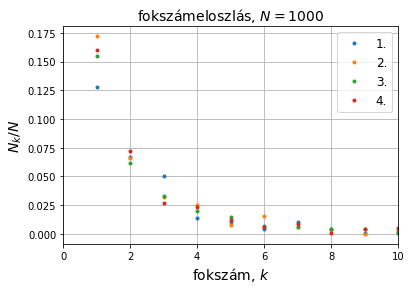

In [16]:
fok1000a=fokszamolo(tree1000a)
gridFok1000=array([x for x in range(1,len(fok1000a)+1)])
plot(gridFok1000,fok1000a/N,'.', label='1.')
fok1000b=fokszamolo(tree1000b)
gridFok1000=array([x for x in range(1,len(fok1000b)+1)])
plot(gridFok1000,fok1000b/N,'.', label='2.')
fok1000c=fokszamolo(tree1000c)
gridFok1000=array([x for x in range(1,len(fok1000c)+1)])
plot(gridFok1000,fok1000c/N,'.', label='3.')
fok1000d=fokszamolo(tree1000d)
gridFok1000=array([x for x in range(1,len(fok1000d)+1)])
plot(gridFok1000,fok1000d/N,'.', label='4.')
grid()
xlabel('fokszám, 'r'$k$', fontsize=14)
ylabel(r'$N_k/N$', fontsize=14)
xlim(0,10)
title('fokszámeloszlás, 'r'$N= 1000$', fontsize=14)
legend(prop={'size': 12})
savefig('fok1B1000.png')

In [50]:
ks1000=array([84,66,88,75])
means.append(mean(ks1000))
mean(ks1000)

78.25

#### 4 mérés $N=10000$ esetére

In [18]:
N=1e4

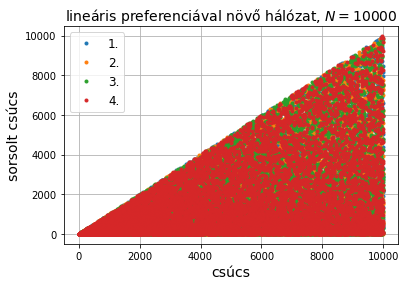

In [19]:
tree1e4a=myNewTree(N,'1')
grid1e4=array([x for x in range(1,len(tree1e4a)+1)])
plot(grid1e4,tree1e4a,'.', label='1.')
tree1e4b=myNewTree(N,'1')
grid1e4=array([x for x in range(1,len(tree1e4b)+1)])
plot(grid1e4,tree1e4b,'.', label='2.')
tree1e4c=myNewTree(N,'1')
grid1e4=array([x for x in range(1,len(tree1e4c)+1)])
plot(grid1e4,tree1e4c,'.', label='3.')
tree1e4d=myNewTree(N,'1')
grid1e4=array([x for x in range(1,len(tree1e4d)+1)])
plot(grid1e4,tree1e4d,'.', label='4.')
grid()
xlabel('csúcs', fontsize=14)
ylabel('sorsolt csúcs', fontsize=14)
title('lineáris preferenciával növő hálózat, 'r'$N= 10000$', fontsize=14)
legend(prop={'size': 12})
savefig('1B1e4.png')

átlagos k:  1.0
maximális k:  152
átlagos k:  1.0
maximális k:  95
átlagos k:  1.0
maximális k:  207
átlagos k:  1.0
maximális k:  145


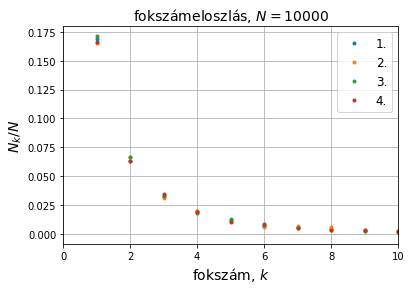

In [20]:
fok1e4a=fokszamolo(tree1e4a)
gridFok1e4=array([x for x in range(1,len(fok1e4a)+1)])
plot(gridFok1e4,fok1e4a/N,'.', label='1.')
fok1e4b=fokszamolo(tree1e4b)
gridFok1e4=array([x for x in range(1,len(fok1e4b)+1)])
plot(gridFok1e4,fok1e4b/N,'.', label='2.')
fok1e4c=fokszamolo(tree1e4c)
gridFok1e4=array([x for x in range(1,len(fok1e4c)+1)])
plot(gridFok1e4,fok1e4c/N,'.', label='3.')
fok1e4d=fokszamolo(tree1e4d)
gridFok1e4=array([x for x in range(1,len(fok1e4d)+1)])
plot(gridFok1e4,fok1e4d/N,'.', label='4.')
grid()
xlabel('fokszám, 'r'$k$', fontsize=14)
ylabel(r'$N_k/N$', fontsize=14)
xlim(0,10)
title('fokszámeloszlás, 'r'$N= 10000$', fontsize=14)
legend(prop={'size': 12})
savefig('fok1B1e4.png')

In [3]:
ks1e4=array([152,95,207,145])
means.append(mean(ks1e4))
mean(ks1e4)

149.75

In [4]:
std(ks1e4)

39.694930406791244

In [52]:
std(means)#hibaszámítás maximális fokszám átlagához

54.746384964366975

#### Szimuláció öt, lineárisan csatolt csúcsból $\left[N_1(t=0)=2,N_2(0)=3,N_{k\neq1,2}=0\right]$

#### 4 mérés $N=100$ esetére

In [23]:
N=100

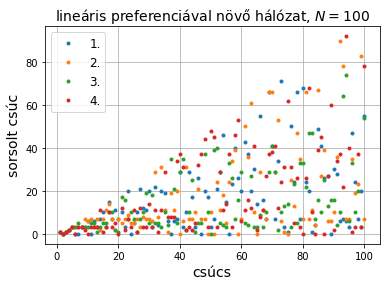

In [24]:
tree100a=myNewTree(N,'2')
grid100=array([x for x in range(1,len(tree100a)+1)])
plot(grid100,tree100a,'.', label='1.')
tree100b=myNewTree(N,'2')
grid100=array([x for x in range(1,len(tree100b)+1)])
plot(grid100,tree100b,'.', label='2.')
tree100c=myNewTree(N,'2')
grid100=array([x for x in range(1,len(tree100c)+1)])
plot(grid100,tree100c,'.', label='3.')
tree100d=myNewTree(N,'2')
grid100=array([x for x in range(1,len(tree100d)+1)])
plot(grid100,tree100d,'.', label='4.')
grid()
xlabel('csúcs', fontsize=14)
ylabel('sorsolt csúc', fontsize=14)
title('lineáris preferenciával növő hálózat, 'r'$N= 100$', fontsize=14)
legend(prop={'size': 12})
savefig('2B100.png')

átlagos k:  1.0
maximális k:  12
átlagos k:  1.0
maximális k:  21
átlagos k:  1.0
maximális k:  14
átlagos k:  1.0
maximális k:  19


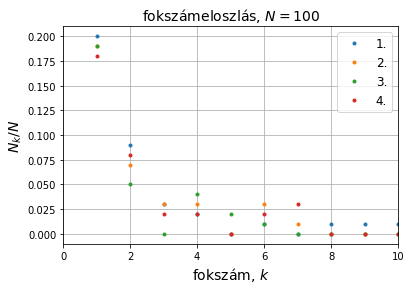

In [25]:
fok100a=fokszamolo(tree100a)
gridFok100=array([x for x in range(1,len(fok100a)+1)])
plot(gridFok100,fok100a/N,'.', label='1.')
fok100b=fokszamolo(tree100b)
gridFok100=array([x for x in range(1,len(fok100b)+1)])
plot(gridFok100,fok100b/N,'.', label='2.')
fok100c=fokszamolo(tree100c)
gridFok100=array([x for x in range(1,len(fok100c)+1)])
plot(gridFok100,fok100c/N,'.', label='3.')
fok100d=fokszamolo(tree100d)
gridFok100=array([x for x in range(1,len(fok100d)+1)])
plot(gridFok100,fok100d/N,'.', label='4.')
grid()
xlabel('fokszám, 'r'$k$', fontsize=14)
ylabel(r'$N_k/N$', fontsize=14)
xlim(0,10)
title('fokszámeloszlás, 'r'$N= 100$', fontsize=14)
legend(prop={'size': 12})
savefig('fok2B100.png')

In [53]:
means= []
ks100=array([12,21,14,19])
means.append(mean(ks100))
mean(ks100)

16.5

#### 4 mérés N=1000 esetén

In [27]:
N=1000

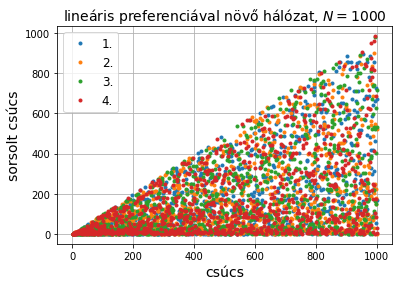

In [28]:
tree1000a=myNewTree(N,'2')
grid1000=array([x for x in range(1,len(tree1000a)+1)])
plot(grid1000,tree1000a,'.', label='1.')
tree1000b=myNewTree(N,'2')
grid1000=array([x for x in range(1,len(tree1000b)+1)])
plot(grid1000,tree1000b,'.', label='2.')
tree1000c=myNewTree(N,'2')
grid1000=array([x for x in range(1,len(tree1000c)+1)])
plot(grid1000,tree1000c,'.', label='3.')
tree1000d=myNewTree(N,'2')
grid1000=array([x for x in range(1,len(tree1000d)+1)])
plot(grid1000,tree1000d,'.', label='4.')
grid()
xlabel('csúcs', fontsize=14)
ylabel('sorsolt csúcs', fontsize=14)
title('lineáris preferenciával növő hálózat, 'r'$N= 1000$', fontsize=14)
legend(prop={'size': 12})
savefig('2B1000.png')

átlagos k:  1.0
maximális k:  58
átlagos k:  1.0
maximális k:  30
átlagos k:  1.0
maximális k:  44
átlagos k:  1.0
maximális k:  63


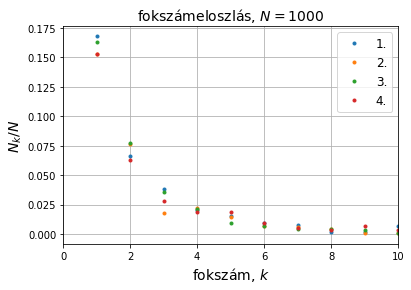

In [29]:
fok1000a=fokszamolo(tree1000a)
gridFok1000=array([x for x in range(1,len(fok1000a)+1)])
plot(gridFok1000,fok1000a/N,'.', label='1.')
fok1000b=fokszamolo(tree1000b)
gridFok1000=array([x for x in range(1,len(fok1000b)+1)])
plot(gridFok1000,fok1000b/N,'.', label='2.')
fok1000c=fokszamolo(tree1000c)
gridFok1000=array([x for x in range(1,len(fok1000c)+1)])
plot(gridFok1000,fok1000c/N,'.', label='3.')
fok1000d=fokszamolo(tree1000d)
gridFok1000=array([x for x in range(1,len(fok1000d)+1)])
plot(gridFok1000,fok1000d/N,'.', label='4.')
grid()
xlabel('fokszám, 'r'$k$', fontsize=14)
ylabel(r'$N_k/N$', fontsize=14)
xlim(0,10)
title('fokszámeloszlás, 'r'$N= 1000$', fontsize=14)
legend(prop={'size': 12})
savefig('fok2B1000.png')

In [54]:
ks1000=array([58,30,44,63])
means.append(mean(ks1000))
mean(ks1000)

48.75

#### 4 mérés N=10000 esetén

In [31]:
N=1e4

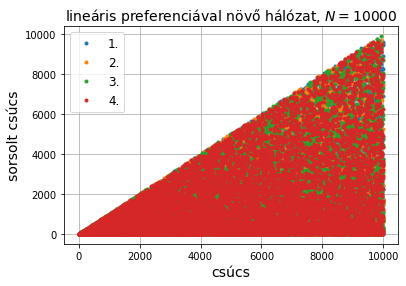

In [32]:
tree1e4a=myNewTree(N,'2')
grid1e4=array([x for x in range(1,len(tree1e4a)+1)])
plot(grid1e4,tree1e4a,'.', label='1.')
tree1e4b=myNewTree(N,'2')
grid1e4=array([x for x in range(1,len(tree1e4b)+1)])
plot(grid1e4,tree1e4b,'.', label='2.')
tree1e4c=myNewTree(N,'2')
grid1e4=array([x for x in range(1,len(tree1e4c)+1)])
plot(grid1e4,tree1e4c,'.', label='3.')
tree1e4d=myNewTree(N,'2')
grid1e4=array([x for x in range(1,len(tree1e4d)+1)])
plot(grid1e4,tree1e4d,'.', label='4.')
grid()
xlabel('csúcs', fontsize=14)
ylabel('sorsolt csúcs', fontsize=14)
title('lineáris preferenciával növő hálózat, 'r'$N= 10000$', fontsize=14)
legend(prop={'size': 12})
savefig('2B1e4.png')

átlagos k:  1.0
maximális k:  81
átlagos k:  1.0
maximális k:  127
átlagos k:  1.0
maximális k:  184
átlagos k:  1.0
maximális k:  212


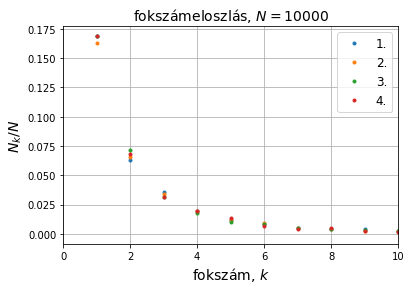

In [33]:
fok1e4a=fokszamolo(tree1e4a)
gridFok1e4=array([x for x in range(1,len(fok1e4a)+1)])
plot(gridFok1e4,fok1e4a/N,'.', label='1.')
fok1e4b=fokszamolo(tree1e4b)
gridFok1e4=array([x for x in range(1,len(fok1e4b)+1)])
plot(gridFok1e4,fok1e4b/N,'.', label='2.')
fok1e4c=fokszamolo(tree1e4c)
gridFok1e4=array([x for x in range(1,len(fok1e4c)+1)])
plot(gridFok1e4,fok1e4c/N,'.', label='3.')
fok1e4d=fokszamolo(tree1e4d)
gridFok1e4=array([x for x in range(1,len(fok1e4d)+1)])
plot(gridFok1e4,fok1e4d/N,'.', label='4.')
grid()
xlabel('fokszám, 'r'$k$', fontsize=14)
ylabel(r'$N_k/N$', fontsize=14)
xlim(0,10)
title('fokszámeloszlás, 'r'$N= 10000$', fontsize=14)
legend(prop={'size': 12})
savefig('fok2B1e4.png')

In [5]:
ks1e4=array([81,127,184,212])
means.append(mean(ks1e4))
mean(ks1e4)

151.0

In [6]:
std(ks1e4)

50.709959574032396

In [56]:
std(means)#hibaszámítás maximális fokszám átlagához

57.334665682193425

#### Szimuláció öt, kereszt alakban összekapcsolt csúcsból $\left[N_1(0)=4,N_4(0)=1,N_{k\neq1,4}=0\right]$

#### 4 mérés $N=100$ esetére

In [36]:
N=100

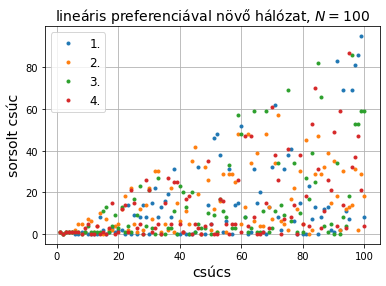

In [37]:
tree100a=myNewTree(N,'3')
grid100=array([x for x in range(1,len(tree100a)+1)])
plot(grid100,tree100a,'.', label='1.')
tree100b=myNewTree(N,'3')
grid100=array([x for x in range(1,len(tree100b)+1)])
plot(grid100,tree100b,'.', label='2.')
tree100c=myNewTree(N,'3')
grid100=array([x for x in range(1,len(tree100c)+1)])
plot(grid100,tree100c,'.', label='3.')
tree100d=myNewTree(N,'3')
grid100=array([x for x in range(1,len(tree100d)+1)])
plot(grid100,tree100d,'.', label='4.')
grid()
xlabel('csúcs', fontsize=14)
ylabel('sorsolt csúc', fontsize=14)
title('lineáris preferenciával növő hálózat, 'r'$N= 100$', fontsize=14)
legend(prop={'size': 12})
savefig('3B100.png')

átlagos k:  1.0
maximális k:  26
átlagos k:  1.0
maximális k:  12
átlagos k:  1.0
maximális k:  23
átlagos k:  1.0
maximális k:  18


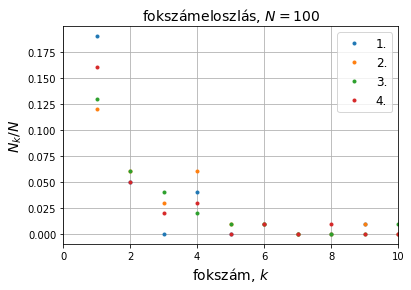

In [38]:
fok100a=fokszamolo(tree100a)
gridFok100=array([x for x in range(1,len(fok100a)+1)])
plot(gridFok100,fok100a/N,'.', label='1.')
fok100b=fokszamolo(tree100b)
gridFok100=array([x for x in range(1,len(fok100b)+1)])
plot(gridFok100,fok100b/N,'.', label='2.')
fok100c=fokszamolo(tree100c)
gridFok100=array([x for x in range(1,len(fok100c)+1)])
plot(gridFok100,fok100c/N,'.', label='3.')
fok100d=fokszamolo(tree100d)
gridFok100=array([x for x in range(1,len(fok100d)+1)])
plot(gridFok100,fok100d/N,'.', label='4.')
grid()
xlabel('fokszám, 'r'$k$', fontsize=14)
ylabel(r'$N_k/N$', fontsize=14)
xlim(0,10)
title('fokszámeloszlás, 'r'$N= 100$', fontsize=14)
legend(prop={'size': 12})
savefig('fok3B100.png')

In [57]:
means=[]
ks100=array([26,12,23,18])
means.append(mean(ks100))
mean(ks100)

19.75

#### 4 mérés $N=1000$ esetére

In [40]:
N=1000

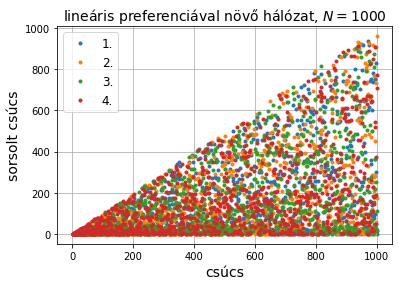

In [41]:
tree1000a=myNewTree(N,'3')
grid1000=array([x for x in range(1,len(tree1000a)+1)])
plot(grid1000,tree1000a,'.', label='1.')
tree1000b=myNewTree(N,'3')
grid1000=array([x for x in range(1,len(tree1000b)+1)])
plot(grid1000,tree1000b,'.', label='2.')
tree1000c=myNewTree(N,'3')
grid1000=array([x for x in range(1,len(tree1000c)+1)])
plot(grid1000,tree1000c,'.', label='3.')
tree1000d=myNewTree(N,'3')
grid1000=array([x for x in range(1,len(tree1000d)+1)])
plot(grid1000,tree1000d,'.', label='4.')
grid()
xlabel('csúcs', fontsize=14)
ylabel('sorsolt csúcs', fontsize=14)
title('lineáris preferenciával növő hálózat, 'r'$N= 1000$', fontsize=14)
legend(prop={'size': 12})
savefig('3B1000.png')

átlagos k:  1.0
maximális k:  42
átlagos k:  1.0
maximális k:  111
átlagos k:  1.0
maximális k:  66
átlagos k:  1.0
maximális k:  66


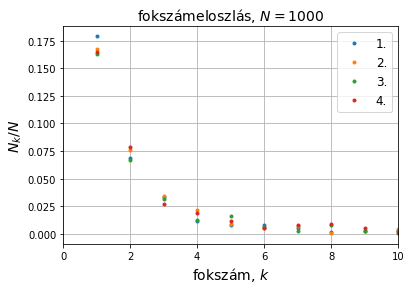

In [42]:
fok1000a=fokszamolo(tree1000a)
gridFok1000=array([x for x in range(1,len(fok1000a)+1)])
plot(gridFok1000,fok1000a/N,'.', label='1.')
fok1000b=fokszamolo(tree1000b)
gridFok1000=array([x for x in range(1,len(fok1000b)+1)])
plot(gridFok1000,fok1000b/N,'.', label='2.')
fok1000c=fokszamolo(tree1000c)
gridFok1000=array([x for x in range(1,len(fok1000c)+1)])
plot(gridFok1000,fok1000c/N,'.', label='3.')
fok1000d=fokszamolo(tree1000d)
gridFok1000=array([x for x in range(1,len(fok1000d)+1)])
plot(gridFok1000,fok1000d/N,'.', label='4.')
grid()
xlabel('fokszám, 'r'$k$', fontsize=14)
ylabel(r'$N_k/N$', fontsize=14)
xlim(0,10)
title('fokszámeloszlás, 'r'$N= 1000$', fontsize=14)
legend(prop={'size': 12})
savefig('fok3bB1000.png')

In [58]:
ks1000=array([42,111,66,66])
means.append(mean(ks1000))
mean(ks1000)

71.25

#### 4 mérés $N=1000$ esetére

In [44]:
N=1e4

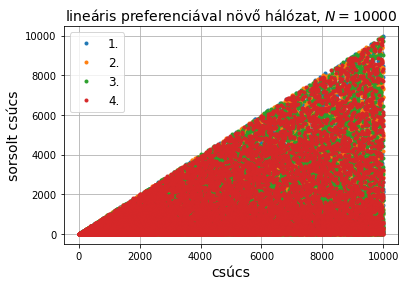

In [45]:
tree1e4a=myNewTree(N,'3')
grid1e4=array([x for x in range(1,len(tree1e4a)+1)])
plot(grid1e4,tree1e4a,'.', label='1.')
tree1e4b=myNewTree(N,'3')
grid1e4=array([x for x in range(1,len(tree1e4b)+1)])
plot(grid1e4,tree1e4b,'.', label='2.')
tree1e4c=myNewTree(N,'3')
grid1e4=array([x for x in range(1,len(tree1e4c)+1)])
plot(grid1e4,tree1e4c,'.', label='3.')
tree1e4d=myNewTree(N,'3')
grid1e4=array([x for x in range(1,len(tree1e4d)+1)])
plot(grid1e4,tree1e4d,'.', label='4.')
grid()
xlabel('csúcs', fontsize=14)
ylabel('sorsolt csúcs', fontsize=14)
title('lineáris preferenciával növő hálózat, 'r'$N= 10000$', fontsize=14)
legend(prop={'size': 12})
savefig('3B1e4.png')

átlagos k:  1.0
maximális k:  138
átlagos k:  1.0
maximális k:  238
átlagos k:  1.0
maximális k:  372
átlagos k:  1.0
maximális k:  157


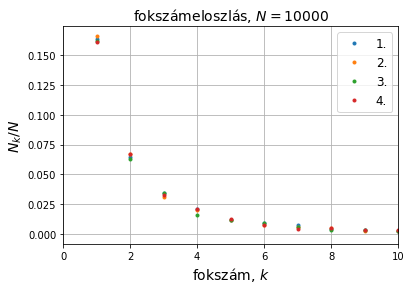

In [46]:
fok1e4a=fokszamolo(tree1e4a)
gridFok1e4=array([x for x in range(1,len(fok1e4a)+1)])
plot(gridFok1e4,fok1e4a/N,'.', label='1.')
fok1e4b=fokszamolo(tree1e4b)
gridFok1e4=array([x for x in range(1,len(fok1e4b)+1)])
plot(gridFok1e4,fok1e4b/N,'.', label='2.')
fok1e4c=fokszamolo(tree1e4c)
gridFok1e4=array([x for x in range(1,len(fok1e4c)+1)])
plot(gridFok1e4,fok1e4c/N,'.', label='3.')
fok1e4d=fokszamolo(tree1e4d)
gridFok1e4=array([x for x in range(1,len(fok1e4d)+1)])
plot(gridFok1e4,fok1e4d/N,'.', label='4.')
grid()
xlabel('fokszám, 'r'$k$', fontsize=14)
ylabel(r'$N_k/N$', fontsize=14)
xlim(0,10)
title('fokszámeloszlás, 'r'$N= 10000$', fontsize=14)
legend(prop={'size': 12})
savefig('fok3B1e4.png')

In [7]:
ks1e4=array([138,238,372,157])
means.append(mean(ks1e4))
mean(ks1e4)

226.25

In [8]:
std(ks1e4)

92.14763968762304

In [60]:
std(means)#hibaszámítás maximális fokszám átlagához

87.76198873468323